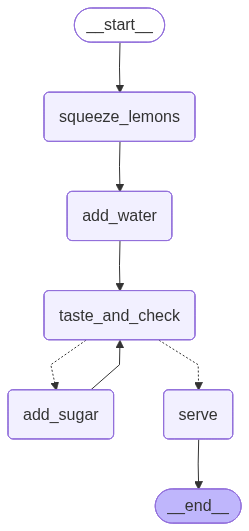

,lemons,sugar,water,juice,mix,final,sweet,attempts
0,4,2,1 glass,Juice from 4 lemons,Juice from 4 lemons + 1 glass water + 1 spoons...,Juice from 4 lemons + 1 glass water + 1 spoons...,True,2


In [1]:
# Re-execute after environment reset
from langgraph.graph import StateGraph
from typing import TypedDict, Dict, Any

# 1. Define state
class LemonLoopState(TypedDict):
    lemons: int
    sugar: int
    water: str
    juice: str
    mix: str
    final: str
    sweet: bool
    attempts: int

# 2. Define nodes
def squeeze_lemons(state: Dict[str, Any]) -> Dict[str, Any]:
    state["juice"] = f"Juice from {state['lemons']} lemons"
    return state

def add_water(state: Dict[str, Any]) -> Dict[str, Any]:
    state["mix"] = f"{state['juice']} + {state['water']} water"
    return state

def add_sugar(state: Dict[str, Any]) -> Dict[str, Any]:
    state["sugar"] += 1
    state["mix"] = f"{state['mix']} + {state['sugar']} spoons sugar"
    state["attempts"] += 1
    return state

def taste_and_check(state: Dict[str, Any]) -> Dict[str, Any]:
    # Simulate taste: sweet if sugar >= 2
    state["sweet"] = state["sugar"] >= 2
    return state

def serve(state: Dict[str, Any]) -> Dict[str, Any]:
    state["final"] = f"{state['mix']} → Served!"
    return state

# 3. Build graph
builder = StateGraph(LemonLoopState)
builder.add_node("squeeze_lemons", squeeze_lemons)
builder.add_node("add_water", add_water)
builder.add_node("add_sugar", add_sugar)
builder.add_node("taste_and_check", taste_and_check)
builder.add_node("serve", serve)

builder.set_entry_point("squeeze_lemons")
builder.add_edge("squeeze_lemons", "add_water")
builder.add_edge("add_water", "taste_and_check")

# Loop condition
def check_sweetness(state: Dict[str, Any]) -> str:
    return "serve" if state["sweet"] else "add_sugar"

builder.add_conditional_edges("taste_and_check", check_sweetness, {
    "serve": "serve",
    "add_sugar": "add_sugar"
})

builder.add_edge("add_sugar", "taste_and_check")
#builder.add_edge("serve","taste_and_check")
builder.set_finish_point("serve")
from IPython.display import Image, display
graph = builder.compile()
# Visualize
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print("Graph visualization failed:", e)
# Initial state
state = {
    "lemons": 4,
    "sugar": 0,
    "water": "1 glass",
    "juice": "",
    "mix": "",
    "final": "",
    "sweet": False,
    "attempts": 0
}

result = graph.invoke(state)

import pandas as pd
result_df = pd.DataFrame([result])
result_df
